# a. Streaming data visualization

### i. For the incoming climate data plot the line graph of air temperature against arrival time. You need to label some interesting points such as maximum and minimum values.

<IPython.core.display.Javascript object>


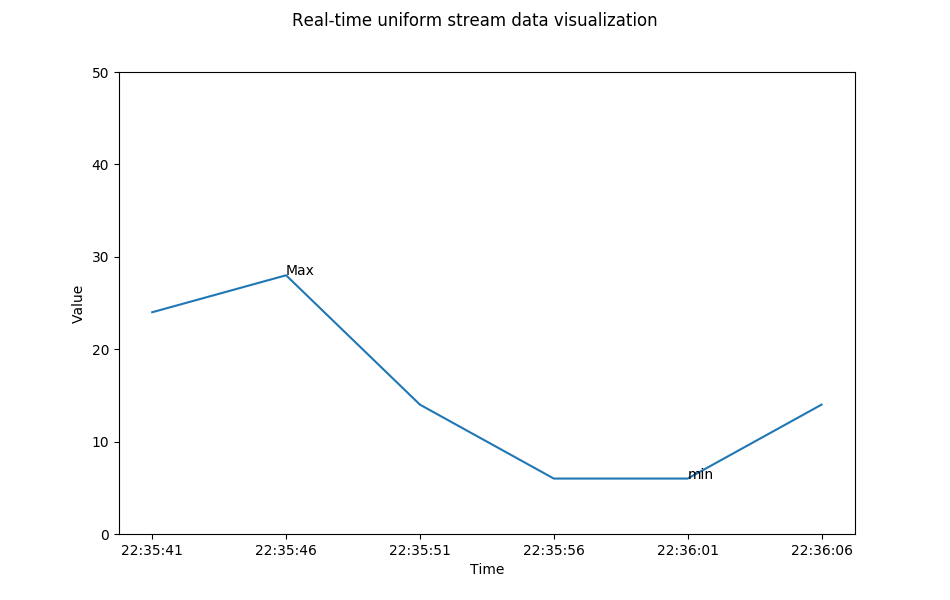

start
producer1
['22:34:40']
[11]
producer1
['22:34:40', '22:34:46']
[11, 16]
producer1
['22:34:40', '22:34:46', '22:34:51']
[11, 16, 11]
producer1
['22:34:40', '22:34:46', '22:34:51', '22:34:56']
[11, 16, 11, 22]
producer1
['22:34:40', '22:34:46', '22:34:51', '22:34:56', '22:35:01']
[11, 16, 11, 22, 10]
producer1
['22:34:40', '22:34:46', '22:34:51', '22:34:56', '22:35:01', '22:35:41']
[11, 16, 11, 22, 10, 24]
producer1
['22:34:46', '22:34:51', '22:34:56', '22:35:01', '22:35:41', '22:35:46']
[16, 11, 22, 10, 24, 28]
producer1
['22:34:51', '22:34:56', '22:35:01', '22:35:41', '22:35:46', '22:35:51']
[11, 22, 10, 24, 28, 14]
producer1
['22:34:56', '22:35:01', '22:35:41', '22:35:46', '22:35:51', '22:35:56']
[22, 10, 24, 28, 14, 6]
producer1
['22:35:01', '22:35:41', '22:35:46', '22:35:51', '22:35:56', '22:36:01']
[10, 24, 28, 14, 6, 6]
producer1
['22:35:41', '22:35:46', '22:35:51', '22:35:56', '22:36:01', '22:36:06']
[24, 28, 14, 6, 6, 14]


KeyboardInterrupt: 

In [36]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'topic1'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=600000, # stop iteration if no message after 60 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_ylim(0,110) 
        ax.set_yticks([0,20,40,60,80,100])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    
    try:
        print('start')
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            
            data = str(message.value.decode('utf-8'))
            data = eval(data)
            
            print(data['sender_id'])
            if data['sender_id'] == 'producer1':

                x.append(data['Creadted_time'].split('T')[1]) 
                y.append(int(data['air_temperature_celcius']))
                print(x)
                print(y)
                max_y = max(y)
                min_y = min(y)
                max_x = ''
                min_x = ''
                for i in range(len(x)):
                    if y[i] == max_y:
                        max_x = x[i]
                for i in range(len(x)):
                    if y[i] == min_y:
                        min_x = x[i]
                # we start plotting only when we have 10 data points
                if len(y) > 5:
                    ax.clear()
                    ax.plot(x, y)
                    ax.set_xlabel('Time')
                    ax.set_ylabel('Value')
                    ax.set_ylim(0,50) 
                    ax.set_yticks([0,10,20,30,40,50])
                    ax.text(max_x,max_y,'Max',fontsize = 10)
                    ax.text(min_x,min_y,'min',fontsize = 10)
                    fig.canvas.draw()
                    x.pop(0) # removing the item in the first position
                    y.pop(0)
            else :
                print('Not from producer 1')
        plt.close('all')
    except Exception as ex:
        print(str(ex))


if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)

In [1]:
# Make sure to install these packages before running (Uncomment to install):
# !pip3 install gmplot

# b. static data visualization

### i. Records with the top 10 number of fires, Plot a bar chart with time as the x-aixs and number of fires as the y-axis

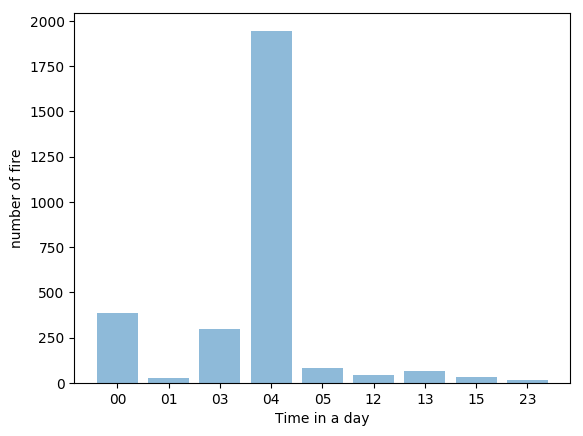

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

hot_pot_time = [x['DateTime'].split('T')[1].split(':')[0] for x in hotspotCollection.find()]
x = list(set(hot_pot_time))
y = [0] * len(x)#initialize y 
x.sort()#sort the x in ascending order
for i in range(len(x)):
    for time in hot_pot_time:
        if int(time) == int(x[i]):
            y[i] = y[i] + 1
#if more then 10, choose top 10
if len(x) >10 :
    #zip the time in day and number of fine into a tuple
    zipped = zip(y,x)
    #sort the tuple accodrding to y(number of fires)
    zipped = sorted(zipped,key=lambda tup:tup[0],reverse=True)
    #choose top 10
    zipped = zipped[0:10]
    zipped = sorted(zipped,key=lambda tup:tup[1])
    newx = [x for x,y in zipped]
    newy = [y for x,y in zipped]
    x = newy
    y = newx
        
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Time in a day')
plt.ylabel('number of fire')


plt.show()

### ii. Plot fire locations in the map with air temperature, surface temperature, relavtive humidity and confidence. See the example below

In [1]:
from pymongo import MongoClient

import pymongo
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client.fit5148_db
climateCollection = db.climate
hotspotCollection = db.hotspot
result = hotspotCollection.find({},{'Date': 0,'DateTime':0,'_id':0})
data = []
for row in result:
    id = row['Climate_id']
    climate = climateCollection.find_one({"_id": id},{"_id":0,"Air Temperature(Celcius)":1,"Relative Humidity" :1})
    row["Air Temperature(Celcius)"] = climate["Air Temperature(Celcius)"]
    row["Relative Humidity"] = climate["Relative Humidity"]
    del row["Climate_id"]
    data.append(row)
   # print(row)

In [2]:
import gmplot
# gmplot contains a simple wrapper around 
# Google’s geocoding service enabling map initilization to the location of your choice.
gmap = gmplot.GoogleMapPlotter(-37.812015244225677, 144.951471202974, 7) # latitude and longitude of melbourne city
#for each data inside the dataset, place a marker on the map
for row in data:
    pop_up = 'Confidence: {a}; Relative Humidity: {b}; Surface Temperature (Celcius): {c}; Air Temperature(Celcius):{d};'.format(a = str(row['Confidence']), b = str(row['Relative Humidity']),c = str(row['Surface Temperature (Celcius)']),d = str(row['Air Temperature(Celcius)']))
    #print(type(pop_up))
    gmap.marker(lat = float(row['Latitude']),lng = float(row['Longitude']), color = '#DC143C',title = pop_up)    
    

In [3]:
import webbrowser

# Drawing the map
gmap.draw("availableParkings.html")
webbrowser.open_new("availableParkings.html")

True